In [4]:
!ls Data/

flowers.csv     google_data.txt ny_temps.txt    stocks.png      yahoo_data.txt


# New York Temperature, Google, and Yahoo!

In [6]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
!head Data/ny_temps.txt

Modified Julian Date	Max Temperature
48988	53
49019	38
49047	31
49078	66
49108	75
49139	65
49169	79
49200	82
49231	83


In [20]:
#------- loading data ---------#
ny_temps = np.loadtxt("Data/ny_temps.txt", skiprows=1, 
                     dtype=np.dtype([("date", "i8"), ("max_temp", "i8")]))

In [12]:
type(ny_temp)

numpy.ndarray

In [13]:
ny_temp.shape

(202,)

In [17]:
ny_temp[0]

(48988, 53)

In [19]:
!head Data/yahoo_data.txt

Modified Julian Date	Stock Value
55463	14.5
55462	14.17
55461	14.04
55460	14.18
55459	13.86
55456	13.89
55455	14.19
55454	14.27
55453	13.63


In [22]:
# load yahoo stock data
yahoo_data = np.loadtxt(
    "Data/yahoo_data.txt", 
    skiprows=1, 
    dtype=np.dtype([("date", "i8"), ("stock_value", "f8")]))

In [23]:
# load google stock data
google_data = np.loadtxt(
    "Data/google_data.txt",
    skiprows=1,
    dtype=np.dtype([("date", "i8"), ("stock_value", "f8")]))

ValueError: no field of name temperature

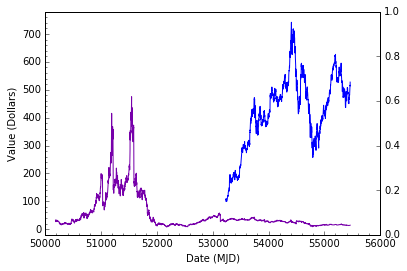

In [24]:
# create figure and first axis
fig, ax1 = plt.subplots()

# plot stock data
yahoo, = ax1.plot(
    yahoo_data["date"], yahoo_data["stock_value"], 
    linestyle="-", color="#7700AA", label="Yahoo! Stock Value")
google, = ax1.plot(
    google_data["date"], google_data["stock_value"], 
    linestyle="-", color="#0000FF", label="Google Stock Value")

# set axis limits, ticks, labels
ax1.set_ylim(-20, 780)
ax1.minorticks_on()
ax1.xaxis.set_ticks_position("bottom")
ax1.set_xlabel("Date (MJD)")
ax1.set_ylabel("Value (Dollars)")

# create a second axis on top of the first axis
ax2 = ax1.twinx()
# plot the temperature data
temps, = ax2.plot(
    ny_temps["date"], ny_temps["max_temperatur"], 
    linestyle="--", color="#FF0000", label="NY Mon. High Temp")

# set axis limits, ticks, label
ax2.set_ylim(-150, 100)
ax2.minorticks_on()
ax2.set_ylabel("Temperature ($^\circ$F)")

# set x limit -- we have to do this after all the plotting on both 
# axes so it doesn't change
ax1.set_xlim(48800, 55600)

# plot the legend
plt.figlegend(
    [yahoo, google, temps], 
    ["Yahoo! Stock Value", "Google Stock Value", "NY Mon. High Temp"], 
    [0.13, 0.45], fontsize=7, frameon=False, numpoints=1)
    
# plot the title
fig.suptitle("New York Temperature, Google, and Yahoo!", 
             fontsize=16, fontweight="bold")